In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os

In [2]:
elyas_freq = pd.read_table( "./processed_files/elyas_imputation_test_qc_plot/TOBEDELETED/elyas.frq" )
rodrigo_freq = pd.read_table( "./processed_files/elyas_imputation_test_qc_plot/TOBEDELETED/rodrigo.frq" )

print ( elyas_freq.head() )
print ( rodrigo_freq.head() )

   CHROM      POS  N_ALLELES  N_CHR ALLELE_FREQ1 ALLELE_FREQ2
0      1  1054076          2   2136   T:0.291199   C:0.708801
1      1  1060235          2   2130   A:0.086385   G:0.913615
2      1  1394425          2   2132  A:0.0497186   G:0.950281
3      1  1498377          2   2136  T:0.0594569   C:0.940543
4      1  1999840          2   2136   A:0.105805   G:0.894195
  CHROM      POS  N_ALLELES  N_CHR ALLELE_FREQ1 ALLELE_FREQ2
0  chr1  1054076          2   2136   C:0.708801   T:0.291199
1  chr1  1060235          2   2130   G:0.913615   A:0.086385
2  chr1  1197837          1   2136          T:1          NaN
3  chr1  1198618          2   2136   T:0.828652   A:0.171348
4  chr1  1200428          1   2134          G:1          NaN


In [3]:
# Elyas
elyas_freq["source"] = "Elyas_vcf (N={0:,})".format( len(elyas_freq) )

new_columns = elyas_freq.ALLELE_FREQ1.str.split(":", expand=True)

elyas_freq["allele1"] = new_columns[0].astype(str)
elyas_freq["freq1"] = new_columns[1].astype(float)

new_columns = elyas_freq.ALLELE_FREQ2.str.split(":", expand=True)

elyas_freq["allele2"] = new_columns[0].astype(str)
elyas_freq["freq2"] = new_columns[1].astype(float)

# Rodrigo

rodrigo_freq["source"] = "Rodrigo_vcf (N={0:,})".format( len(rodrigo_freq) )

new_columns = rodrigo_freq.ALLELE_FREQ1.str.split(":", expand=True)

rodrigo_freq["allele1"] = new_columns[0].astype(str)
rodrigo_freq["freq1"] = new_columns[1].astype(float)

new_columns = rodrigo_freq.ALLELE_FREQ2.str.split(":", expand=True)

rodrigo_freq["allele2"] = new_columns[0].astype(str)
rodrigo_freq["freq2"] = new_columns[1].astype(float)

In [4]:
print( elyas_freq.dtypes )

CHROM             int64
POS               int64
N_ALLELES         int64
N_CHR             int64
ALLELE_FREQ1     object
ALLELE_FREQ2     object
source           object
allele1          object
freq1           float64
allele2          object
freq2           float64
dtype: object


In [5]:
# Combine dataframes
combined_data = pd.concat([elyas_freq, rodrigo_freq], ignore_index=True)

Text(0.5, 1.0, 'Allele 1 frequency')

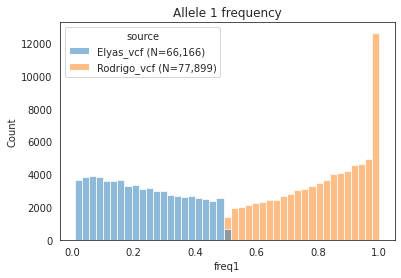

In [6]:
sns.set_style('white')

sns.histplot(
    x = "freq1",
    hue="source",
    data = combined_data,
).set_title("Allele 1 frequency")

Text(0.5, 1.0, 'Allele 2 frequency')

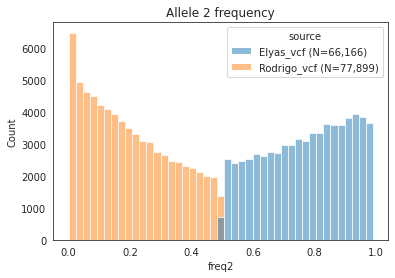

In [7]:
sns.set_style('white')

sns.histplot(
    x = "freq2",
    hue="source",
    data = combined_data,
).set_title("Allele 2 frequency")

In [ ]:
elyas_freq.head()

In [8]:
# Elyas
elyas_freq["chr_pos"] = elyas_freq.CHROM.astype(str) + ":" + elyas_freq.POS.astype(str)
elyas_freq["chr_pos_all1_all2"] = elyas_freq["chr_pos"] + "_" + elyas_freq.allele1.astype(str) + elyas_freq.allele2.astype(str)

# Rodrigo
rodrigo_freq["chr_pos"] = rodrigo_freq.CHROM.astype(str) + ":" + rodrigo_freq.POS.astype(str)
rodrigo_freq["chr_pos_all1_all2"] = rodrigo_freq["chr_pos"] + "_" + rodrigo_freq.allele1.astype(str) + rodrigo_freq.allele2.astype(str)


In [9]:
print( elyas_freq.head() )
print( rodrigo_freq.head() )

   CHROM      POS  N_ALLELES  N_CHR ALLELE_FREQ1 ALLELE_FREQ2  \
0      1  1054076          2   2136   T:0.291199   C:0.708801   
1      1  1060235          2   2130   A:0.086385   G:0.913615   
2      1  1394425          2   2132  A:0.0497186   G:0.950281   
3      1  1498377          2   2136  T:0.0594569   C:0.940543   
4      1  1999840          2   2136   A:0.105805   G:0.894195   

                 source allele1     freq1 allele2     freq2    chr_pos  \
0  Elyas_vcf (N=66,166)       T  0.291199       C  0.708801  1:1054076   
1  Elyas_vcf (N=66,166)       A  0.086385       G  0.913615  1:1060235   
2  Elyas_vcf (N=66,166)       A  0.049719       G  0.950281  1:1394425   
3  Elyas_vcf (N=66,166)       T  0.059457       C  0.940543  1:1498377   
4  Elyas_vcf (N=66,166)       A  0.105805       G  0.894195  1:1999840   

  chr_pos_all1_all2  
0      1:1054076_TC  
1      1:1060235_AG  
2      1:1394425_AG  
3      1:1498377_TC  
4      1:1999840_AG  
  CHROM      POS  N_ALLELES  N_C

In [17]:
# type( rodrigo_freq["chr_pos"] )

# elyas_freq["chr_pos"].intersection(rodrigo_freq["chr_pos"])

elyas_freq["chr_pos"].compare(rodrigo_freq["chr_pos"])

pandas.core.series.Series